Instalação do pacote Twython para ter acesso a API do Twitter

In [1]:
!pip install Twython

In [2]:
!pip install nxviz==0.6.3

In [3]:
from twython import Twython, TwythonError

In [4]:
import nxviz
from nxviz.plots import CircosPlot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [5]:
import itertools
import networkx as nx

from operator import itemgetter

In [6]:
import numpy as np

Informação do arquivo .txt com a chave de acesso a API. A primeira linha é a API_KEY e a segunda linha do arquivo é a API_SECRET_KEY

In [8]:
# Abre o arquivo
my_file = open("C:/arquivos/Analise de redes/projetofinal/keys.txt", "r")

# lê os dados
content = my_file.read()

# extrai as chaves e preenche as variáveis
API_KEY, API_SECRET_KEY = content.split("\n")

# fecha o arquivo
my_file.close()

In [9]:
twitter = Twython(API_KEY, API_SECRET_KEY)

authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

https://api.twitter.com/oauth/authenticate?oauth_token=qxYD2QAAAAABYzI2AAABftRuWUY


Os authentication_tokens incluem tokens temporários que irá junto com o PIN verificador.

In [10]:
# o PIN deve ser alterado para o que foi obtido 
VERIFIER = '0717407'

twitter = Twython(API_KEY, API_SECRET_KEY,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(VERIFIER)

Novo objeto Twython com a chaves de autorização.

In [11]:
twitter = Twython(API_KEY, API_SECRET_KEY,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])

twitter.verify_credentials()

{'id': 1445349945729552386,
 'id_str': '1445349945729552386',
 'name': 'Anchieta A C Silva',
 'screen_name': 'Anchieta_Acacio',
 'location': '',
 'description': 'Tecnologia da Informação',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 0,
 'friends_count': 4,
 'listed_count': 0,
 'created_at': 'Tue Oct 05 11:27:58 +0000 2021',
 'favourites_count': 0,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 0,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 'profile_background_image_url_https': None,
 'profile_background_tile': False,
 'profile_image_url': 'http://pbs.twimg.com/profile_images/1445350044626997255/99Y99yo3_normal.jpg',
 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1445350044626997255/99Y99yo3_normal.jpg',
 'profile_link_c

Fazendo uma analise no Twitter do @metaverse

In [12]:
user = twitter.show_user(screen_name='metaverse')
user

{'id': 8018332,
 'id_str': '8018332',
 'name': 'Metaverse',
 'screen_name': 'Metaverse',
 'location': '',
 'profile_location': None,
 'description': 'The #Metaverse 🕹️ https://t.co/q56WSyF0NS 📲 https://t.co/x9BdkSKaSt in https://t.co/8IkhGDitJ1: #VirtualWorlds #VirtualReality #AugmentedReality https://t.co/BHUyFbvikb 🇩🇪 @MTVRSM',
 'url': 'https://t.co/Wbf0giMQkH',
 'entities': {'url': {'urls': [{'url': 'https://t.co/Wbf0giMQkH',
     'expanded_url': 'https://Metaver.se',
     'display_url': 'Metaver.se',
     'indices': [0, 23]}]},
  'description': {'urls': [{'url': 'https://t.co/q56WSyF0NS',
     'expanded_url': 'http://MTVRS.TV',
     'display_url': 'MTVRS.TV',
     'indices': [18, 41]},
    {'url': 'https://t.co/x9BdkSKaSt',
     'expanded_url': 'http://Metaliv.es',
     'display_url': 'Metaliv.es',
     'indices': [44, 67]},
    {'url': 'https://t.co/8IkhGDitJ1',
     'expanded_url': 'http://Metaspac.es',
     'display_url': 'Metaspac.es',
     'indices': [71, 94]},
    {'url': 'ht

Exibindo informações básicas sobre o Twitter

In [13]:
print("""
Twitter user @{screen_name}
has {followers_count} followers,
follows {friends_count} users,
and has tweeted {statuses_count} times.
""".format(**user))




Twitter user @Metaverse
has 27770 followers,
follows 473 users,
and has tweeted 24026 times.



Consultando o limite da API

In [14]:
twitter.get_application_rate_limit_status()['resources']['followers']

{'/followers/ids': {'limit': 15, 'remaining': 15, 'reset': 1644242446},
 '/followers/list': {'limit': 15, 'remaining': 15, 'reset': 1644242446}}

In [15]:
import datetime
import pandas as pd

# Cria a lista vazia 
names = []
usernames = []
ids = []
locations = []
follower_count = []

# Obtendo a data
datestamp = datetime.datetime.now().strftime("%Y-%m-%d")

# Nome do usuário para obter os seguidores
username = 'metaverse'

# Paginação
next_cursor = -1

In [16]:
# 14 requisições
for i in range(14):
  # Obtendo os seguidores
  get_followers = twitter.get_followers_list(screen_name=username,
                                             count=200,
                                             cursor=next_cursor)
  # Retorna os seguidore
  for follower in get_followers["users"]:
      names.append(follower["name"])
      usernames.append(follower["screen_name"])
      ids.append(follower["id"])
      locations.append(follower["location"])
      follower_count.append(follower["followers_count"])

  next_cursor = get_followers["next_cursor"]

Dataframe com os dados coletados

In [17]:
df = pd.DataFrame.from_dict({"display_name": names,
                             "username": usernames,
                             "user_id": ids,
                             "location": locations,
                             "followers_count": follower_count})


df.head()

,display_name,username,user_id,location,followers_count
0,Rami Hassan Alduais,AlduaisRami,1424881143367749636,,50
1,Myamoo,Myamoo976262041,1490680853042970628,,0
2,RobTel,robw71,236985610,,31
3,Kenny,Kenny21227922,1353688569412378626,,0
4,MUNDO DIGITAL. META,dos_hiolanda,1490674212847202306,,0


In [18]:
print(df)

             display_name         username              user_id  \
0     Rami Hassan Alduais      AlduaisRami  1424881143367749636   
1                  Myamoo  Myamoo976262041  1490680853042970628   
2                  RobTel           robw71            236985610   
3                   Kenny    Kenny21227922  1353688569412378626   
4     MUNDO DIGITAL. META     dos_hiolanda  1490674212847202306   
...                   ...              ...                  ...   
2795                Murat    Carlosgucci41           4341975857   
2796         Emma Husband     emma_husband           1238653628   
2797               Apolis         Apolis77  1431243900920926212   
2798             Tinaarya        Tinaarya9  1479073735332216836   
2799          Mz💸MoneyMel      Chocalate41           2971171299   

                 location  followers_count  
0                                       50  
1                                        0  
2                                       31  
3              

Número de linha e colunas

In [19]:
display(df.shape)

(2800, 5)

Matriz de co-ocorrência

In [20]:
matriz = df.drop(['user_id', 'username'], axis=1).pivot_table(index=["followers_count"], columns="display_name", aggfunc=lambda x: 1, fill_value=0)
print(matriz.shape)
matriz.head()

(534, 2763)


location                                              \
display_name          ## #SpaniardintheMetaverse $POODL $electaD-rip   
followers_count                                                        
0                      0                       0      0            0   
1                      0                       1      0            0   
2                      0                       0      0            0   
3                      0                       0      0            0   
4                      0                       0      0            0   

                                                             ...  \
display_name    $richierich$  . . 🇵🇸 .... ..... 08082547327  ...   
followers_count                                              ...   
0                          0  0    0    1     1           0  ...   
1                          0  0    0    0     0           0  ...   
2                          0  1    0    0     0           0  ...   
3                          0  0    0    0     0           0  ...   
4                          0  0    0    0     0           0  ...   

                                                                 \
display_name    🇹🇷ÖZCAN GÖRGÜN🇹🇷 🌈loveislove🌈 🏹 GameFi Hunter 🎯   
followers_count                                                   
0                              0            0                 0   
1                              0            0                 0   
2                              0            0                 0   
3                              0            0                 1   
4                              0            0                 0   

                                                                       \
display_name    💎chenjeff.eth🚀100% Ifb 💎crypto falconz2💎 💬Val(σ, σ) 👀   
followers_count                                                         
0                                    0                 0            0   
1                                    0                 0            0   
2                                    0                 0            0   
3                                    0                 0            0   
4                                    0                 0            0   

                                                                               \
display_name    🔇C H E T A H🐶 😷 ✌Solo Justicia y VERDAD!!✌ Basta de Mentiras.   
followers_count                                                                 
0                           0                                               0   
1                           0                                               0   
2                           0                                               0   
3                           0                                               0   
4                           0                                               0   

                                                                
display_name    🤚Menderes🐞TİBUK🐬 🧠Brainomatica NFT Collection🧠  
followers_count                                                 
0                              0                             0  
1                              0                             0  
2                              0                             0  
3                              0                             0  
4                              0                             0  

[5 rows x 2763 columns]

In [21]:
%%time
from scipy.sparse import csr_matrix

matriz = csr_matrix(matriz)
C = matriz.T * matriz
print(C.shape)

(2763, 2763)
Wall time: 43.9 ms


In [28]:
tam = 2763

Compactando o Array para melhorar o desempenho

In [22]:
C.toarray()

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [23]:
song_freq_vec = np.sum(matriz, axis=0)

In [25]:
song_freq_vec = song_freq_vec.reshape(tam, 1)

Cria uma nova matriz com as informações da matriz de Coocorrência

In [26]:
DG = nx.Graph()

In [29]:
for i in range(tam):
    DG.add_node(i)

In [30]:
%%time
for i in range(tam):
    for j in range(tam):
        if i != j:
            if C[i,j] > 0:
                DG.add_edge(i, j)

Wall time: 7min


In [31]:
print(DG)

Graph with 2763 nodes and 95888 edges


In [32]:
%%time
for n, d in DG.nodes(data=True):
    DG.nodes[n]["class"] = DG.degree(n)

Wall time: 23.9 ms


Gráfico CircosPlot

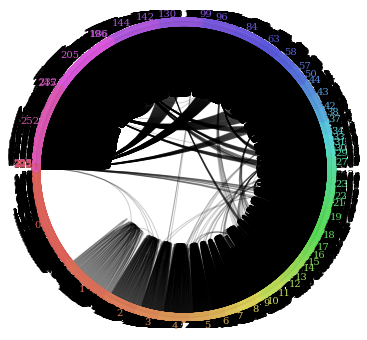

In [35]:
c = CircosPlot(
    DG,
    node_grouping="class",
    node_color="class",
    node_order="class",
    node_labels=True,
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=2,
)
c.draw()
plt.show()

Centralidade de Grau

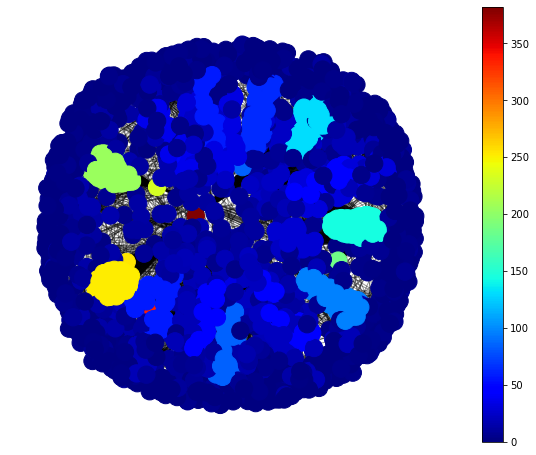

In [36]:
# Grau da rede
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Posição
pos = nx.spring_layout(DG,seed=123456789,k=0.3)
# cor dos nós
color = list(dict(nx.degree(DG)).values())

# Desenha arestas
nx.draw_networkx_edges(DG,
                       pos=pos,
                       alpha=0.4, ax=ax)

# Desenha nós
nodes = nx.draw_networkx_nodes(DG,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# Adiciona os rótulos
#nx.draw_networkx_labels(DG, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degreeDG.png', transparent=True,dpi=300)
plt.show()

In [37]:
nx.degree_centrality(DG)

{0: 0.007603186097031136,
 1: 0.07422157856625633,
 2: 0.0,
 3: 0.030412744388124545,
 4: 0.011223750905141201,
 5: 0.07096307023895727,
 6: 0.0039826212889210715,
 7: 0.09160028964518464,
 8: 0.09123823316437364,
 9: 0.00832729905865315,
 10: 0.0068790731354091235,
 11: 0.02280955829109341,
 12: 0.020999275887038378,
 13: 0.000724112961622013,
 14: 0.015206372194062272,
 15: 0.004706734250543084,
 16: 0.009775524981897175,
 17: 0.0003620564808110065,
 18: 0.0003620564808110065,
 19: 0.09123823316437364,
 20: 0.09123823316437364,
 21: 0.05213613323678493,
 22: 0.0068790731354091235,
 23: 0.000724112961622013,
 24: 0.03475742215785663,
 25: 0.09123823316437364,
 26: 0.0018102824040550324,
 27: 0.07422157856625633,
 28: 0.04706734250543084,
 29: 0.007603186097031136,
 30: 0.000724112961622013,
 31: 0.020999275887038378,
 32: 0.030412744388124545,
 33: 0.09123823316437364,
 34: 0.0068790731354091235,
 35: 0.01556842867487328,
 36: 0.02063721940622737,
 37: 0.0,
 38: 0.0025343953656770456,

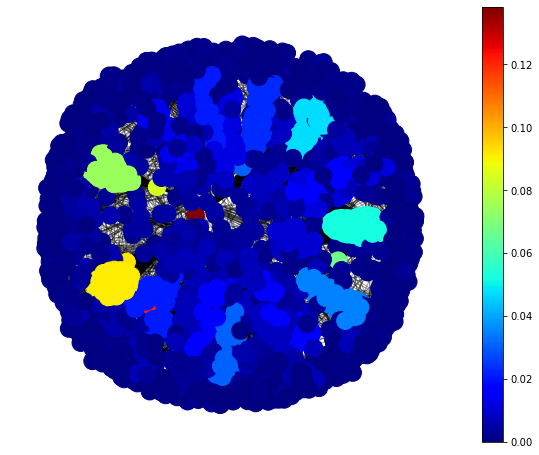

In [39]:
# Grau de centralidade da rede
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Posição
pos = nx.spring_layout(DG,seed=123456789,k=0.3)
# Cor dos nós
color = list(dict(nx.degree_centrality(DG)).values())

# Desenha as arestas
nx.draw_networkx_edges(DG,
                       pos=pos,
                       alpha=0.4, ax=ax)

# Desenha nós
nodes = nx.draw_networkx_nodes(DG,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# Adiciona os rótulos
#nx.draw_networkx_labels(M, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centralityDG.png', transparent=True,dpi=300)
plt.show()

Centralidade de proximidade

In [40]:
nx.closeness_centrality(DG)

{0: 0.007603186097031137,
 1: 0.07386081514430536,
 2: 0.0,
 3: 0.08735842169447174,
 4: 0.011223750905141203,
 5: 0.08786166294115795,
 6: 0.0039826212889210715,
 7: 0.1263337175273899,
 8: 0.12618438689201472,
 9: 0.008514166919716895,
 10: 0.0068790731354091235,
 11: 0.02280955829109341,
 12: 0.020999275887038378,
 13: 0.000724112961622013,
 14: 0.053063061207351415,
 15: 0.004706734250543085,
 16: 0.04585593844879268,
 17: 0.0003620564808110065,
 18: 0.0003620564808110065,
 19: 0.12618438689201472,
 20: 0.12618438689201472,
 21: 0.07673993345493543,
 22: 0.07901701799455549,
 23: 0.000724112961622013,
 24: 0.034789368317928185,
 25: 0.12618438689201472,
 26: 0.0018102824040550326,
 27: 0.07386081514430536,
 28: 0.09660813693270992,
 29: 0.007603186097031137,
 30: 0.000724112961622013,
 31: 0.020999275887038378,
 32: 0.08735842169447174,
 33: 0.12618438689201472,
 34: 0.07901701799455549,
 35: 0.08192785211868339,
 36: 0.05850378521534281,
 37: 0.0,
 38: 0.0025343953656770456,
 39: 

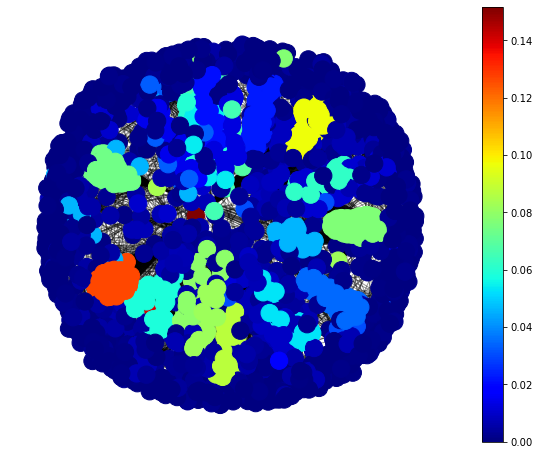

In [41]:
# Proximidade centralidade da rede 
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Posição
pos = nx.spring_layout(DG,seed=123456789,k=0.3)
# Cor dos nós
color = list(dict(nx.closeness_centrality(DG)).values())

# Desenha arestas
nx.draw_networkx_edges(DG,
                       pos=pos,
                       alpha=0.4, ax=ax)

# Desenha nós
nodes = nx.draw_networkx_nodes(DG,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# Adiciona rótulos
#nx.draw_networkx_labels(M, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centralityDG.png', transparent=True,dpi=600)
plt.show()

Centralidade de intermediação

In [42]:
nx.betweenness_centrality(DG)

{0: 9.966060319317818e-06,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0048857299391729374,
 6: 0.0,
 7: 0.00014214749192290152,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 0.0,
 83: 0.00042591794627821415,
 84: 0.0,
 85: 0.0,
 86: 0.0,
 87: 0.0,
 88: 0.0,
 89: 0.0,
 90: 0.0,
 91: 0.0,
 92: 0.0,
 93: 0

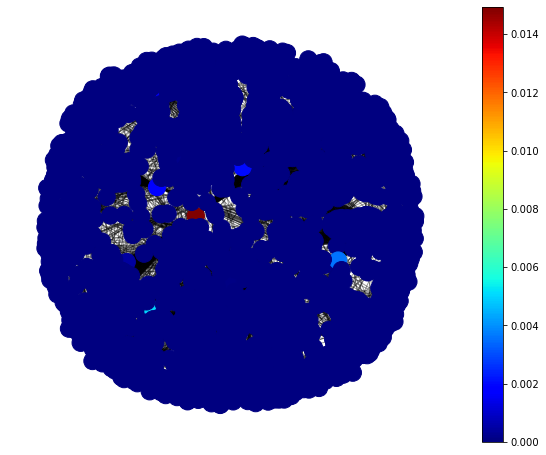

In [43]:
# Centralidade de intermediação da rede 
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Posição
pos = nx.spring_layout(DG,seed=123456789,k=0.3)
# Cor dos nós
color = list(dict(nx.betweenness_centrality(DG)).values())

# Desenha arestas
nx.draw_networkx_edges(DG,
                       pos=pos,
                       alpha=0.4, ax=ax)

# Desenha nós
nodes = nx.draw_networkx_nodes(DG,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# Adiciona rótulos
#nx.draw_networkx_labels(M, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centralityDG.png', transparent=True,dpi=600)
plt.show()

Centralidade Vetoria

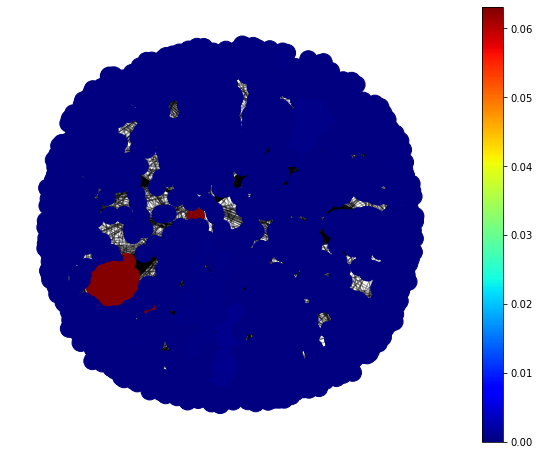

In [44]:
# Centralidade do autovetor da rede
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Posição
pos = nx.spring_layout(DG,seed=123456789,k=0.3)
# Cor dos nós
color = list(dict(nx.eigenvector_centrality(DG)).values())

# Desenha as arestas
nx.draw_networkx_edges(DG,
                       pos=pos,
                       alpha=0.4, ax=ax)

# Desenha os nós
nodes = nx.draw_networkx_nodes(DG,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# Adiciona rótulos
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centralityDG.png', transparent=True,dpi=600)
plt.show()

Todas as centralidade juntas

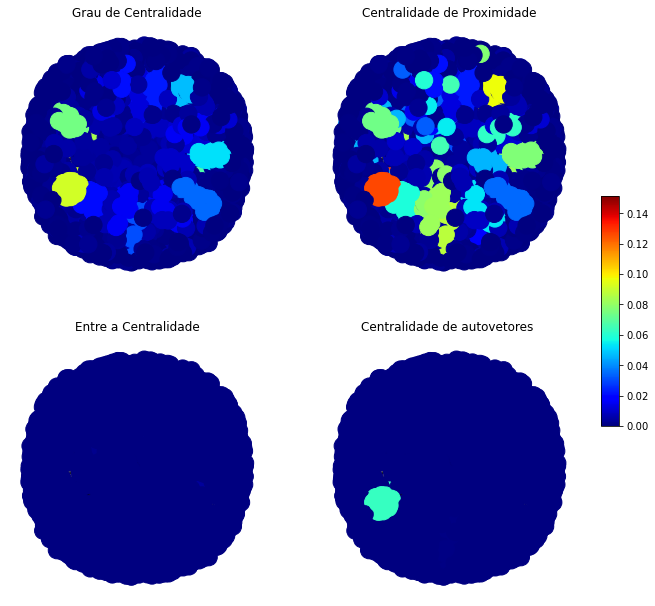

In [46]:
# Centralidade do autovetor da rede
fig, ax = plt.subplots(2,2,figsize=(10,8))

# Valor máximo das métricas 
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(DG).items()]),
                      max([v for k, v in nx.degree_centrality(DG).items()]),
                      max([v for k, v in nx.closeness_centrality(DG).items()]),
                      max([v for k, v in nx.betweenness_centrality(DG).items()])])

# Posição
pos = nx.spring_layout(DG,seed=123456789,k=0.3)

# Cor dos nós
color_degree = list(dict(nx.degree_centrality(DG)).values())
color_closeness = list(dict(nx.closeness_centrality(DG)).values())
color_betweenness = list(dict(nx.betweenness_centrality(DG)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(DG)).values())

# 
# Desenha as arestas
#
# degree centrality
nx.draw_networkx_edges(DG,
                       pos=pos,
                       alpha=0.4, ax=ax[0,0])

# closeness centrality
nx.draw_networkx_edges(DG,
                       pos=pos,
                       alpha=0.4, ax=ax[0,1])

# betweenness centrality
nx.draw_networkx_edges(DG,
                       pos=pos,
                       alpha=0.4, ax=ax[1,0])

# eigenvector centrality
nx.draw_networkx_edges(DG,
                       pos=pos,
                       alpha=0.4, ax=ax[1,1])

# Desenhas os nós
nodes = nx.draw_networkx_nodes(DG,
                 pos=pos,
                 node_color=color_degree,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(DG,
                 pos=pos,
                 node_color=color_closeness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(DG,
                 pos=pos,
                 node_color=color_betweenness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(DG,
                 pos=pos,
                 node_color=color_eigenvector,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,1])

# 
# Adiciona os rótulos
#
#nx.draw_networkx_labels(DG, pos=pos,
#                        font_color='white', ax=ax[0,0])
#nx.draw_networkx_labels(DG, pos=pos,
#                        font_color='white', ax=ax[0,1])
#nx.draw_networkx_labels(DG, pos=pos,
#                        font_color='white', ax=ax[1,0])
#nx.draw_networkx_labels(DG, pos=pos,
#                        font_color='white', ax=ax[1,1])

# eliminate axis
ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Grau de Centralidade")
ax[0,1].set_title("Centralidade de Proximidade")
ax[1,0].set_title("Entre a Centralidade")
ax[1,1].set_title("Centralidade de autovetores ")


# Create an unique colorbar
# reference: https://stackoverflow.com/questions/60848582/unique-colorbar-at-the-right-of-multiple-subplots
plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.savefig('alltogetherDG.png', transparent=True,dpi=600,bbox_inches="tight")

Histograma

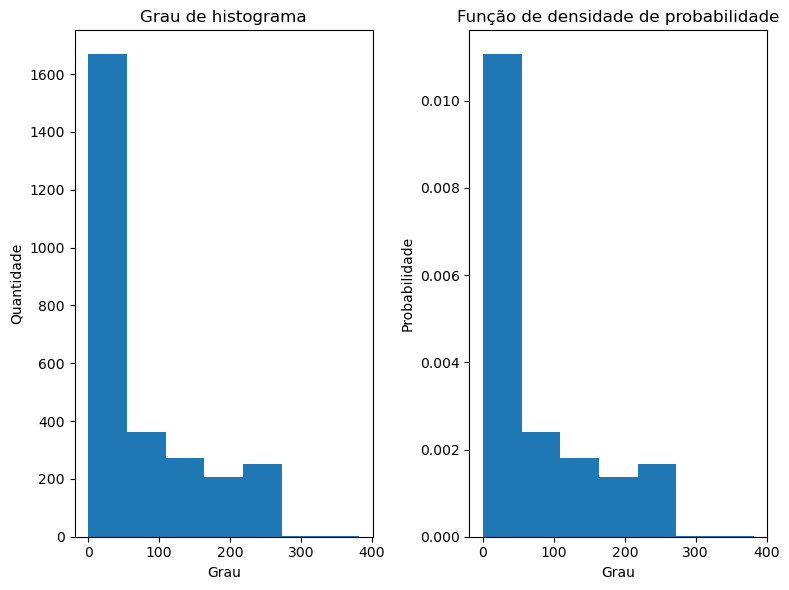

In [48]:
plt.style.use("default")
# Sequência de graus 
degree_sequenceDG = sorted([d for n, d in DG.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequenceDG,bins=7)
ax[1].hist(degree_sequenceDG,bins=7,density=True)

ax[0].set_title("Grau de histograma")
ax[0].set_ylabel("Quantidade")
ax[0].set_xlabel("Grau")

ax[1].set_title("Função de densidade de probabilidade")
ax[1].set_ylabel("Probabilidade")
ax[1].set_xlabel("Grau")

plt.tight_layout()
plt.show()

Função de densidade de probabilidade

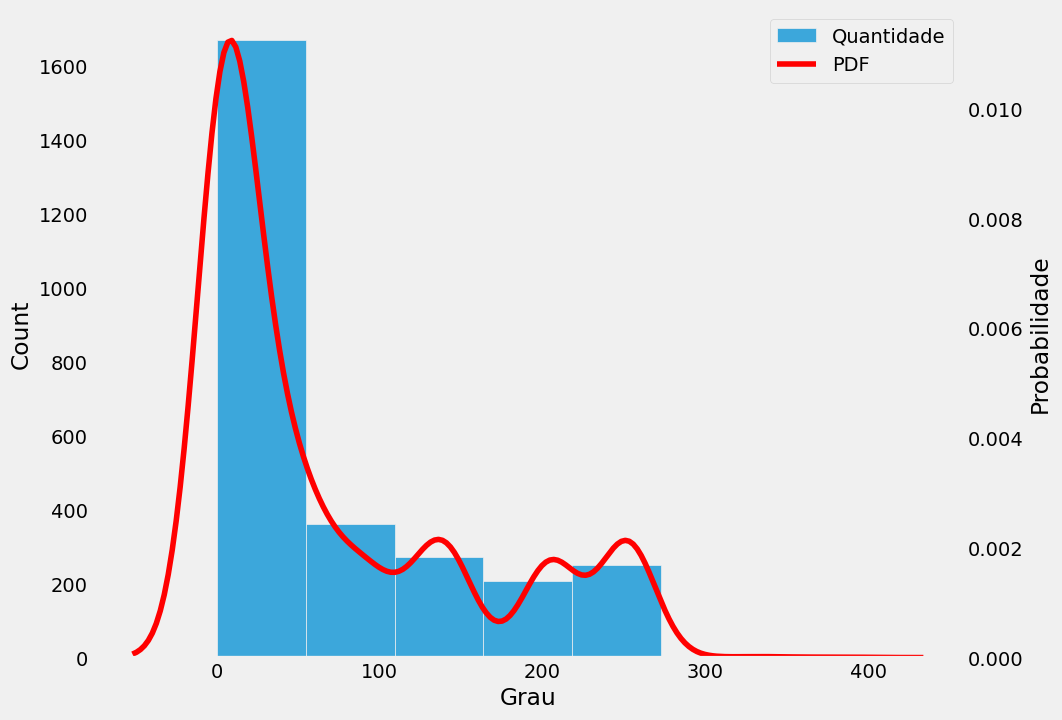

In [49]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequenceDG,bins=7,label="Quantidade",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequenceDG,color='r',label="PDF",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Grau")
ax2.set_ylabel("Probabilidade")

plt.savefig('probability_density_functionDG.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

Função de densidade cumulativa 

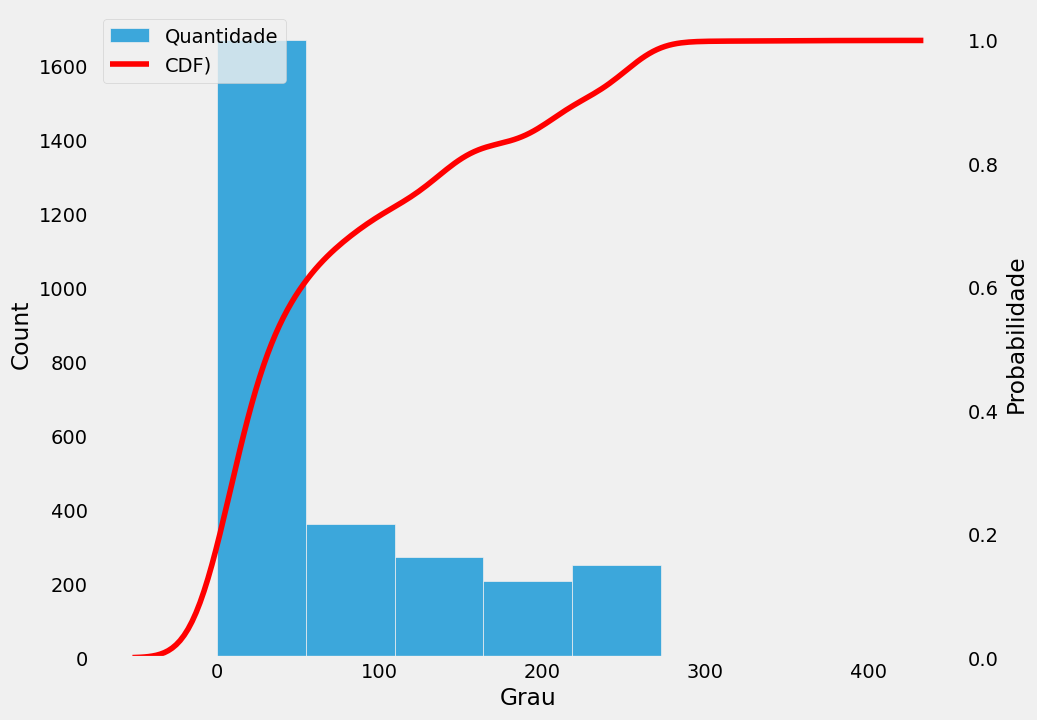

In [50]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequenceDG,bins=7,label="Quantidade",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequenceDG,color='r',label="CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Grau")
ax2.set_ylabel("Probabilidade")

plt.savefig('cumulative_density_functionDG.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

In [52]:
print("{} nodes, {} edges".format(len(DG), nx.number_of_edges(DG)))

2763 nodes, 95888 edges


In [53]:
plt.style.use("default")
# Sequência de graus 
degree_sequenceDG = sorted([d for n, d in DG.degree()], reverse=True)  

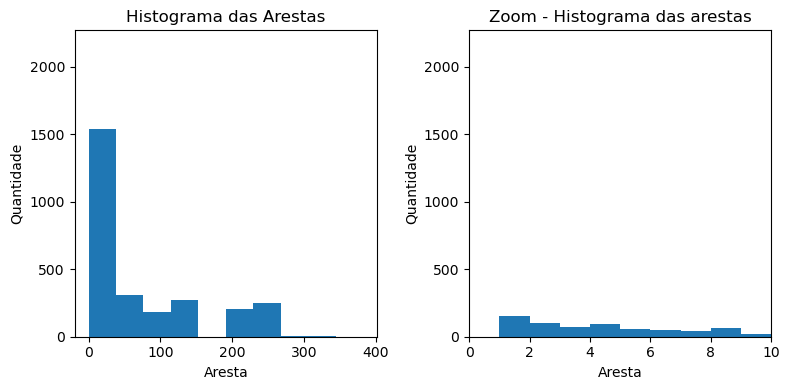

In [54]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequenceDG)
ax[1].hist(degree_sequenceDG,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Histograma das Arestas")
ax[0].set_ylabel("Quantidade")
ax[0].set_xlabel("Aresta")
ax[0].set_ylim(0,2268)

ax[1].set_title("Zoom - Histograma das arestas")
ax[1].set_ylabel("Quantidade")
ax[1].set_xlabel("Aresta")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,2268)

plt.tight_layout()
plt.show()

In [55]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(DG.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(DG, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cnaDG.graphml")

2306 nodes, 95810 edges


Salvando dados capturados

In [56]:
df.to_csv(username+"-"+datestamp+".csv")

In [57]:
most_recent_tweet = user['status']
most_recent_tweet

{'created_at': 'Mon Feb 07 12:03:01 +0000 2022',
 'id': 1490657346904903680,
 'id_str': '1490657346904903680',
 'text': '#Metaverse »#MetaversePlatform Infographic: #MonthlyActiveUsers Now Nearly #HalfaBillion People (But Probably Many… https://t.co/c5pLn5q65R',
 'truncated': True,
 'entities': {'hashtags': [{'text': 'Metaverse', 'indices': [0, 10]},
   {'text': 'MetaversePlatform', 'indices': [12, 30]},
   {'text': 'MonthlyActiveUsers', 'indices': [44, 63]},
   {'text': 'HalfaBillion', 'indices': [75, 88]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/c5pLn5q65R',
    'expanded_url': 'https://twitter.com/i/web/status/1490657346904903680',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [116, 139]}]},
 'source': '<a href="https://buffer.com" rel="nofollow">Buffer</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'geo': 

Criando uma rede de mensão #metaverse

In [58]:
NUM_TWEETS_TO_FETCH = 1700

cursor = twitter.cursor(twitter.search, q='metaverse', count=100, result_type='mixed')
search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

1700

Loop aninhado porque um tweet pode ter mais de um usuário mencionado. 

In [59]:
D = nx.DiGraph()

for tweet in search_tweets:
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        my_edge = (tweet_sn, mentioned_sn)
        if D.has_edge(*my_edge):
            D.edges[my_edge]['weight'] += 1
        else:
            D.add_edge(*my_edge, weight=1)

Análise da rede criada

Usuário de maior grau

In [60]:
max(D.nodes, key=D.in_degree)

'HeresOfficial'

Usuário de menor grau

In [61]:
min(D.nodes, key=D.in_degree)

'SelmanKris'

Obtendos 5 de maior grau e o número de mensões

In [62]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('GalaxyHeroesGHC', 172),
 ('HeresOfficial', 145),
 ('Fujin_Metaverse', 137),
 ('Stepnofficial', 73),
 ('ToriZero_REDLAB', 61)]

Removendo posíveis SPAN

In [63]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('binance_world_', 81),
 ('rgw34521', 60),
 ('ni9833you', 58),
 ('bvw2331', 57),
 ('fw3r3d', 57)]

Número de conexões

In [64]:
nx.number_weakly_connected_components(D)

342

Grafico in-strength

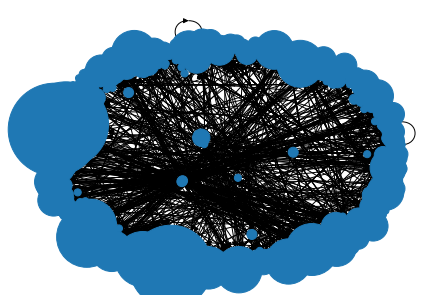

In [65]:
node_sizes = [D.in_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)

Criando uma matriz

In [66]:
M = nx.Graph()

In [67]:
for tweet in search_tweets:
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        my_edge = (tweet_sn, mentioned_sn)
        if M.has_edge(*my_edge):
            M.edges[my_edge]['weight'] += 1
        else:
            M.add_edge(*my_edge, weight=1)

Número de nós e arestas

In [68]:
print(M)

Graph with 2004 nodes and 2264 edges


In [69]:
for n, d in M.nodes(data=True):
    M.nodes[n]["class"] = M.degree(n)

Gráfico CircoPlot

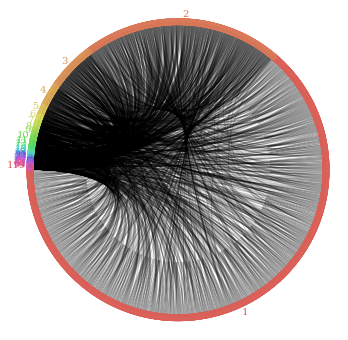

In [70]:
c = CircosPlot(
    M,
    node_grouping="class",
    node_color="class",
    node_order="class",
    node_labels=False,
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=2
)
c.draw()
plt.show()

Centralidade de Grau

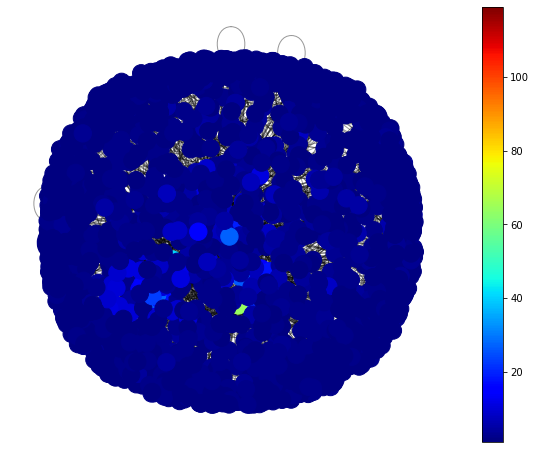

In [71]:
# Grau da rede
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Posição
pos = nx.spring_layout(M,seed=123456789,k=0.3)
# cor dos nós
color = list(dict(nx.degree(M)).values())

# Desenha arestas
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax)

# Desenha nós
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# Adiciona os rótulos
#nx.draw_networkx_labels(M, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

In [72]:
nx.degree_centrality(M)

{'SelmanKris': 0.000998502246630055,
 'TrustPad': 0.000998502246630055,
 'Bullieverse': 0.000998502246630055,
 'shifu871': 0.000998502246630055,
 'alexveiga_': 0.0004992511233150275,
 'Royal_rhino_gc': 0.0004992511233150275,
 'CoderRetweet': 0.0014977533699450825,
 'sonu_monika': 0.0004992511233150275,
 'VentureBeat': 0.000998502246630055,
 'BATMANGENEVA': 0.0004992511233150275,
 'Whalesincoming': 0.0004992511233150275,
 'KenanOrenler1': 0.000998502246630055,
 'MonsterCryptoo': 0.00199700449326011,
 'darevenin': 0.0004992511233150275,
 'LumariTae': 0.0004992511233150275,
 'b_konusbaeva': 0.000998502246630055,
 'deficonnect': 0.01198202695956066,
 'BitrueOfficial': 0.009485771342985522,
 'aldaircryptotec': 0.0004992511233150275,
 'czcalls': 0.0004992511233150275,
 'Nib_bio': 0.0004992511233150275,
 'elonmusk': 0.00998502246630055,
 'IvSkeptical': 0.0004992511233150275,
 'elochima': 0.00399400898652022,
 'Adnans_music': 0.0004992511233150275,
 'Tran_Datt': 0.0004992511233150275,
 'Ralver

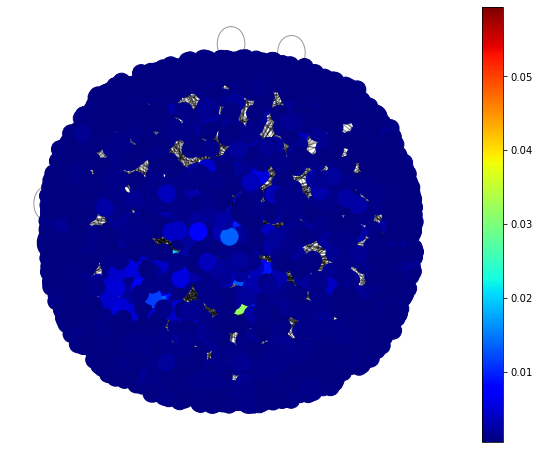

In [73]:
# Grau de centralidade da rede
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Posição
pos = nx.spring_layout(M,seed=123456789,k=0.3)
# Cor dos nós
color = list(dict(nx.degree_centrality(M)).values())

# Desenha as arestas
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax)

# Desenha nós
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# Adiciona os rótulos
#nx.draw_networkx_labels(M, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

Centralidade de proximidade

In [74]:
nx.closeness_centrality(M)

{'SelmanKris': 0.001681687994324303,
 'TrustPad': 0.0022822908494401256,
 'Bullieverse': 0.0022822908494401256,
 'shifu871': 0.000998502246630055,
 'alexveiga_': 0.0006656681644200366,
 'Royal_rhino_gc': 0.0006656681644200366,
 'CoderRetweet': 0.0016339127672128169,
 'sonu_monika': 0.0011233150274588116,
 'VentureBeat': 0.0017973040439340985,
 'BATMANGENEVA': 0.0004992511233150275,
 'Whalesincoming': 0.0004992511233150275,
 'KenanOrenler1': 0.001560159760359461,
 'MonsterCryptoo': 0.0020802130138126147,
 'darevenin': 0.0004992511233150275,
 'LumariTae': 0.0004992511233150275,
 'b_konusbaeva': 0.006617524693352128,
 'deficonnect': 0.012053348548605663,
 'BitrueOfficial': 0.008437343984023965,
 'aldaircryptotec': 0.0004992511233150275,
 'czcalls': 0.0004992511233150275,
 'Nib_bio': 0.04983255866567975,
 'elonmusk': 0.05905759204842837,
 'IvSkeptical': 0.0021301381261441175,
 'elochima': 0.00399400898652022,
 'Adnans_music': 0.0021301381261441175,
 'Tran_Datt': 0.0007488766849725411,
 'Ra

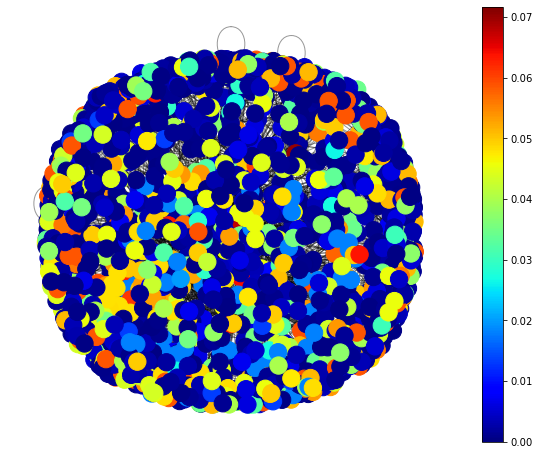

In [75]:
# Proximidade centralidade da rede 
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Posição
pos = nx.spring_layout(M,seed=123456789,k=0.3)
# Cor dos nós
color = list(dict(nx.closeness_centrality(M)).values())

# Desenha arestas
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax)

# Desenha nós
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# Adiciona rótulos
#nx.draw_networkx_labels(M, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centrality.png', transparent=True,dpi=600)
plt.show()

Centralidade de intermediação

In [76]:
nx.betweenness_centrality(M)

{'SelmanKris': 2.4937618547204167e-07,
 'TrustPad': 1.49625711283225e-06,
 'Bullieverse': 1.49625711283225e-06,
 'shifu871': 4.987523709440833e-07,
 'alexveiga_': 0.0,
 'Royal_rhino_gc': 0.0,
 'CoderRetweet': 4.48877133849675e-06,
 'sonu_monika': 0.0,
 'VentureBeat': 4.48877133849675e-06,
 'BATMANGENEVA': 0.0,
 'Whalesincoming': 0.0,
 'KenanOrenler1': 1.9950094837763334e-06,
 'MonsterCryptoo': 4.48877133849675e-06,
 'darevenin': 0.0,
 'LumariTae': 0.0,
 'b_konusbaeva': 1.8375087350571488e-07,
 'deficonnect': 0.0001094761454222263,
 'BitrueOfficial': 4.264332771571912e-05,
 'aldaircryptotec': 0.0,
 'czcalls': 0.0,
 'Nib_bio': 0.0,
 'elonmusk': 0.01888936608899381,
 'IvSkeptical': 0.0,
 'elochima': 1.3965066386434333e-05,
 'Adnans_music': 0.0,
 'Tran_Datt': 0.0,
 'Ralvero': 9.975047418881667e-07,
 'hugsforyjh': 4.987523709440833e-07,
 'nxrthi': 0.0,
 'StagebeatNFT': 0.0,
 'guldal_gulenay': 4.987523709440834e-06,
 'ilcreations': 0.0,
 'PiyasHossain18': 0.0,
 'tgdaopad': 9.975047418881667e

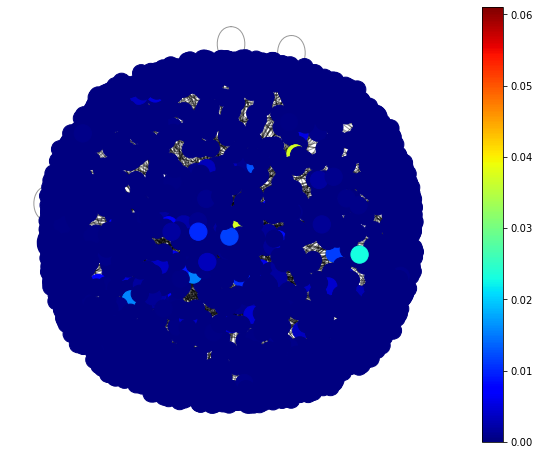

In [77]:
# Centralidade de intermediação da rede 
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Posição
pos = nx.spring_layout(M,seed=123456789,k=0.3)
# Cor dos nós
color = list(dict(nx.betweenness_centrality(M)).values())

# Desenha arestas
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax)

# Desenha nós
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# Adiciona rótulos
#nx.draw_networkx_labels(M, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

Centralidade Vetoria

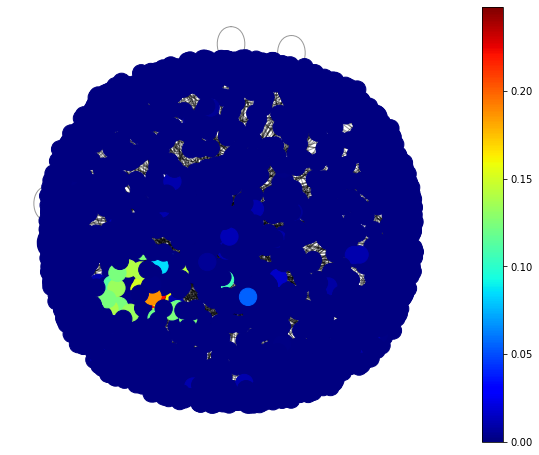

In [78]:
# Centralidade do autovetor da rede
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Posição
pos = nx.spring_layout(M,seed=123456789,k=0.3)
# Cor dos nós
color = list(dict(nx.eigenvector_centrality(M)).values())

# Desenha as arestas
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax)

# Desenha os nós
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# Adiciona rótulos
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centrality.png', transparent=True,dpi=600)
plt.show()

Todas as centralidade juntas

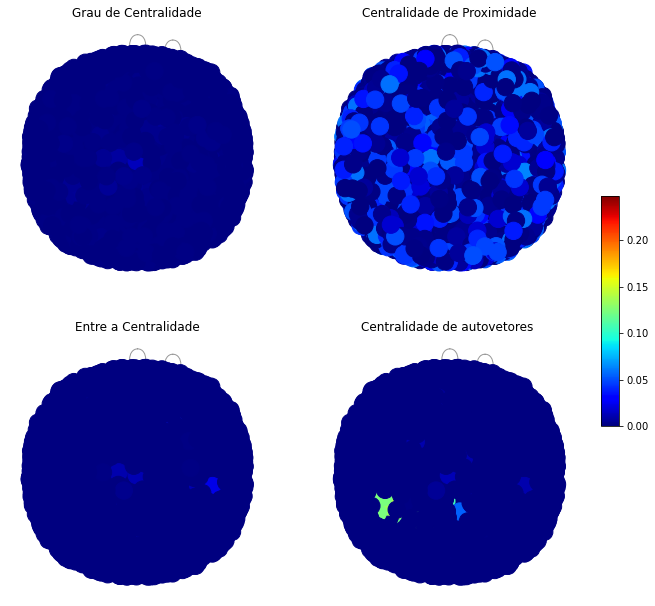

In [79]:
# Centralidade do autovetor da rede
fig, ax = plt.subplots(2,2,figsize=(10,8))

# Valor máximo das métricas 
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(M).items()]),
                      max([v for k, v in nx.degree_centrality(M).items()]),
                      max([v for k, v in nx.closeness_centrality(M).items()]),
                      max([v for k, v in nx.betweenness_centrality(M).items()])])

# Posição
pos = nx.spring_layout(M,seed=123456789,k=0.3)

# Cor dos nós
color_degree = list(dict(nx.degree_centrality(M)).values())
color_closeness = list(dict(nx.closeness_centrality(M)).values())
color_betweenness = list(dict(nx.betweenness_centrality(M)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(M)).values())

# 
# Desenha as arestas
#
# degree centrality
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax[0,0])

# closeness centrality
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax[0,1])

# betweenness centrality
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax[1,0])

# eigenvector centrality
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax[1,1])

# Desenhas os nós
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color_degree,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color_closeness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color_betweenness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color_eigenvector,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,1])

# 
# Adiciona os rótulos
#
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax[0,0])
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax[0,1])
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax[1,0])
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax[1,1])

# eliminate axis
ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Grau de Centralidade")
ax[0,1].set_title("Centralidade de Proximidade")
ax[1,0].set_title("Entre a Centralidade")
ax[1,1].set_title("Centralidade de autovetores ")


# Create an unique colorbar
# reference: https://stackoverflow.com/questions/60848582/unique-colorbar-at-the-right-of-multiple-subplots
plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.savefig('alltogether.png', transparent=True,dpi=600,bbox_inches="tight")

Histograma

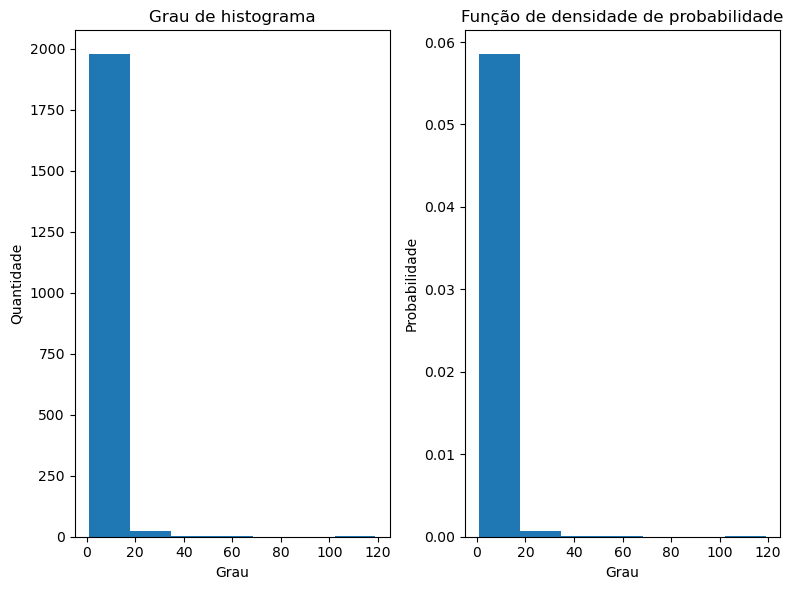

In [80]:
plt.style.use("default")
# Sequência de graus 
degree_sequence = sorted([d for n, d in M.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Grau de histograma")
ax[0].set_ylabel("Quantidade")
ax[0].set_xlabel("Grau")

ax[1].set_title("Função de densidade de probabilidade")
ax[1].set_ylabel("Probabilidade")
ax[1].set_xlabel("Grau")

plt.tight_layout()
plt.show()

Função de densidade de probabilidade

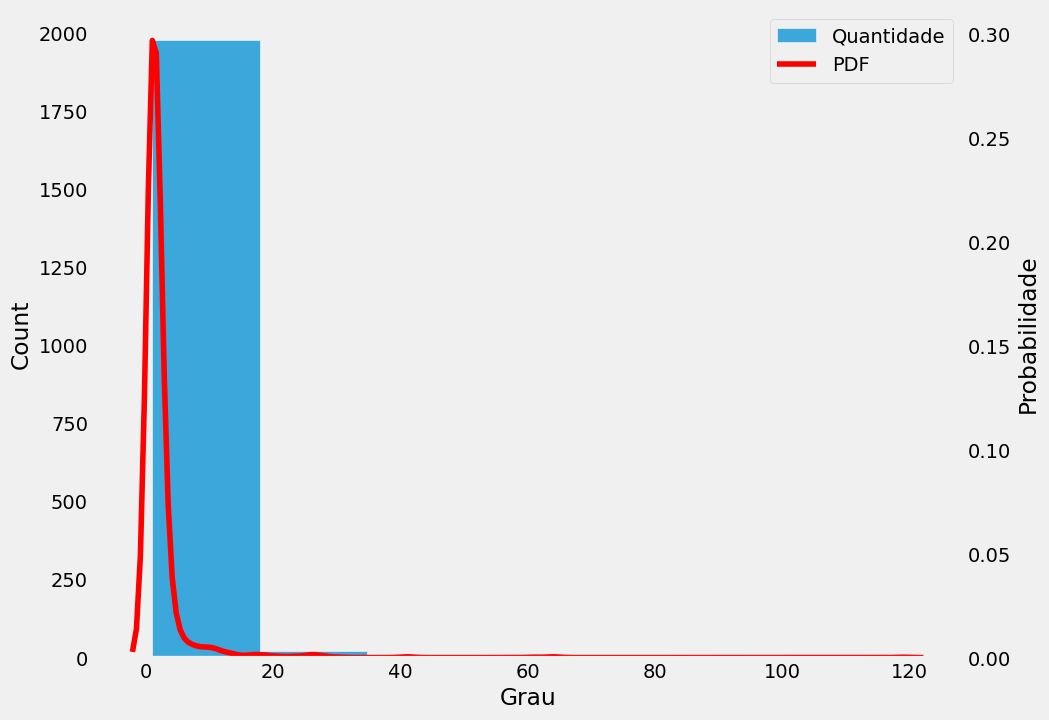

In [81]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Quantidade",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="PDF",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Grau")
ax2.set_ylabel("Probabilidade")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

Função de densidade cumulativa 

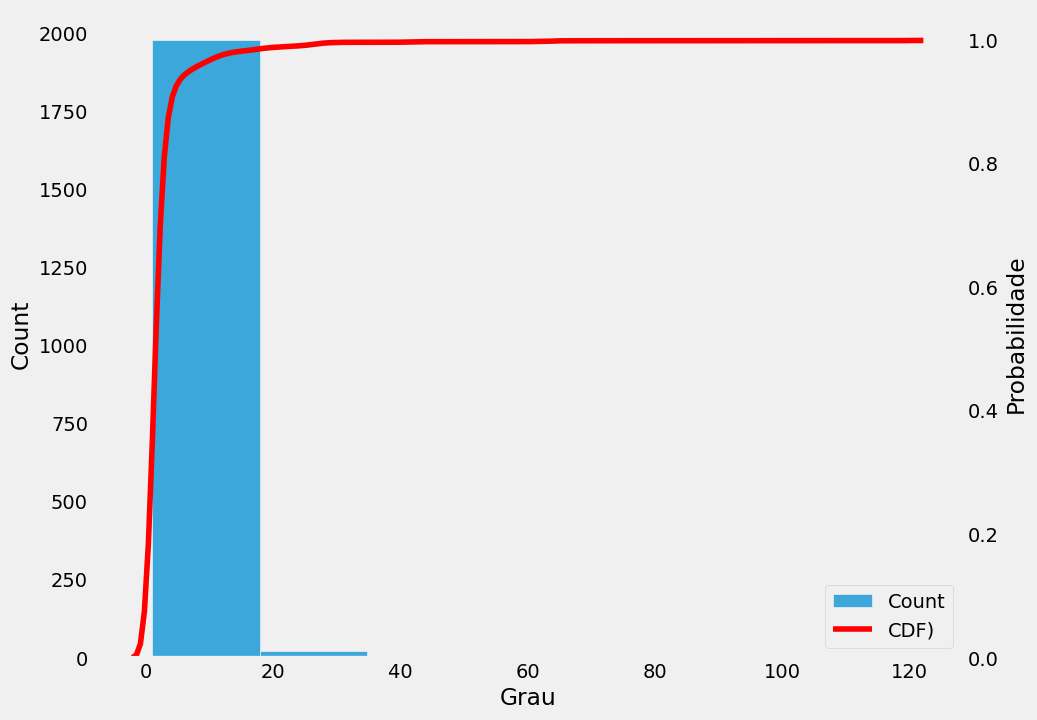

In [82]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Grau")
ax2.set_ylabel("Probabilidade")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

In [83]:
print("{} nodes, {} edges".format(len(M), nx.number_of_edges(M)))

2004 nodes, 2264 edges


In [84]:
plt.style.use("default")
# Sequência de graus 
degree_sequence = sorted([d for n, d in M.degree()], reverse=True)  

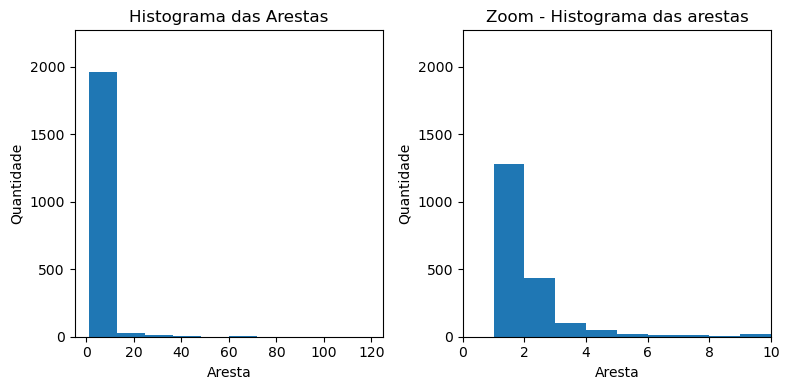

In [85]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Histograma das Arestas")
ax[0].set_ylabel("Quantidade")
ax[0].set_xlabel("Aresta")
ax[0].set_ylim(0,2268)

ax[1].set_title("Zoom - Histograma das arestas")
ax[1].set_ylabel("Quantidade")
ax[1].set_xlabel("Aresta")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,2268)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(M.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(M, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")

641 nodes, 759 edges
